<a href="https://colab.research.google.com/github/ferchove/fernado_vega/blob/main/semana2/Ejercicio_LimpiezaPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELOS PREDICTIVOS PARA SISTEMAS INTELIGENTES

## Ejercicio: Limpieza usando pandas

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [4]:
# Cargar el dataset DailyDelhiClimateTrain.csv
data =pd.read_csv("/content/DailyDelhiClimateTrain.csv", header =0)
data.head()


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [41]:
# Verificar las estadísticas generales del dataset

data.tail()


,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [67]:
# Revisar la información, encuentre en los datos máximos y mínimos de las variables
data.info()
dat_min =data.min()
dat_max=data.max()

print('LOS DATOS MINIMO', dat_min)
print('DATOS MAXIMOS', dat_max)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
LOS DATOS MINIMO date            2013-01-01
meantemp               6.0
humidity         13.428571
wind_speed             0.0
meanpressure     -3.041667
dtype: object
DATOS MAXIMOS date             2017-01-01
meantemp          38.714286
humidity              100.0
wind_speed            42.22
meanpressure    7679.333333
dtype: object


In [43]:
# Revisar si encuentra algo fuera de lo normal
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [7]:
# Eliminar las columnas meantemp, humidity y wind_speed. Mantenga la columna meanpressure
data_aux=data.drop(['meantemp','humidity','wind_speed'],axis=1)
data_aux.head()


,date,meanpressure
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000


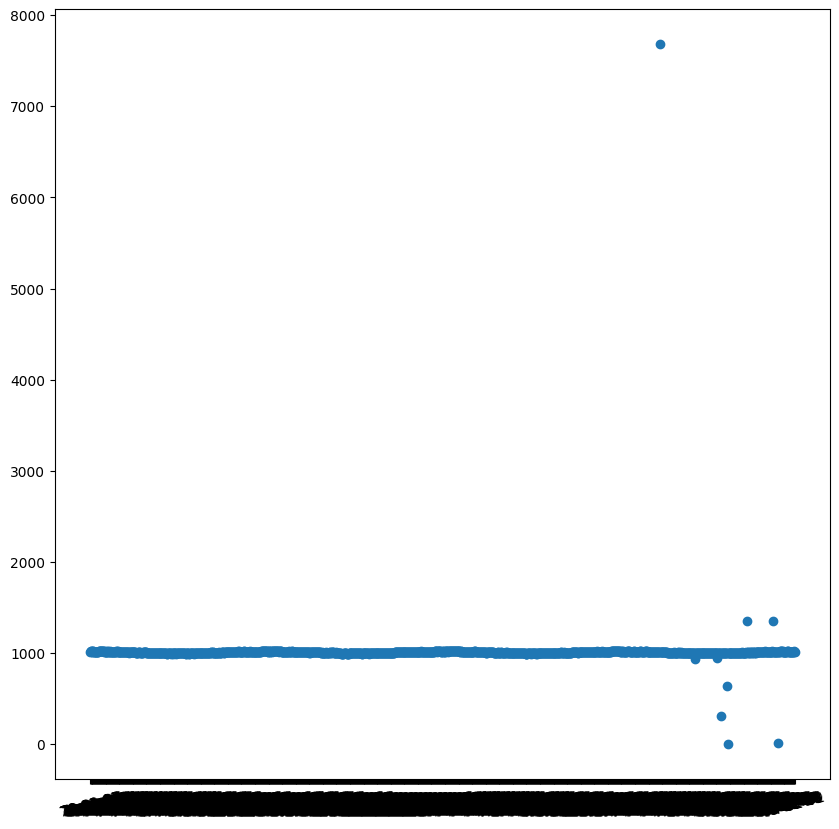

In [45]:
# Graficar los datos del campo meanpressure
# Qué puede decir de la gráfica?
#respuesta:  se observa que la mayor parte de los datos de presión se mantienen constantes alrededor de un valor típico de aproximadamente 1000 hPa durante la mayoría del tiempo.

# Hay algo atípico en esa respuesta temporal? hay un evento atípico muy evidente alrededor del día 1200, donde se observa un pico extremadamente alto en la presión,
#que luego cae bruscamente por debajo de los valores habituales, incluso llegando a valores negativos

import matplotlib.dates as mdates
plt.rc('figure',figsize =(10,10))

dataM = data.dropna()
plt.scatter(data.date, data.meanpressure)
plt.xticks(rotation=15)
dtFmt = mdates.DateFormatter('%y-%m-%d')
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.show()


<Axes: ylabel='meanpressure'>

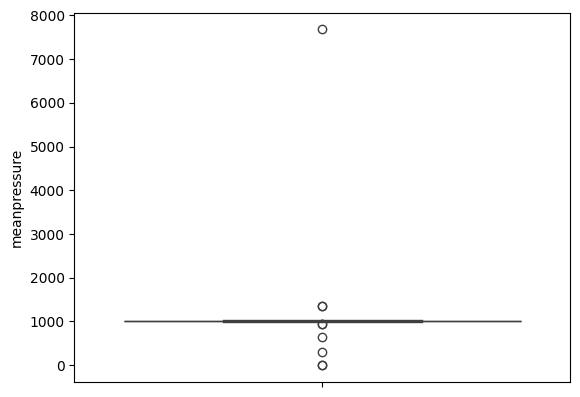

In [10]:
# Realice un diagrama de cajas y alambres para determinar visualmente si hay outliers

sns.boxplot(data=data['meanpressure'])


In [46]:
# Calcular el parámetro Zscore para la columna meanpressure


Zscore = np.abs(stats.zscore(data.loc[:,['meanpressure']].dropna()))

index, flag = np.where(Zscore > 0.3)
print(index)
print(flag)



[1182 1255 1300 1309 1321 1323 1362 1416 1427]
[0 0 0 0 0 0 0 0 0]


In [47]:
data.loc[index]


,date,meantemp,humidity,wind_speed,meanpressure
1182,2016-03-28,25.933333,52.800000,6.546667,7679.333333
1255,2016-06-09,35.733333,43.733333,9.260000,938.066667
1300,2016-07-24,31.437500,72.250000,2.431250,946.312500
1309,2016-08-02,30.687500,72.125000,6.375000,310.437500
1321,2016-08-14,28.933333,83.700000,6.370000,633.900000
1323,2016-08-16,31.333333,66.416667,14.666667,-3.041667
1362,2016-09-24,31.240000,66.480000,5.496154,1352.615385
1416,2016-11-17,21.730769,51.730769,11.550000,1350.296296
1427,2016-11-28,22.454545,37.318182,9.185714,12.045455


In [50]:
data_out = data.loc[:,['meanpressure']][(Zscore < 0.3)]
data_out.head()

,meanpressure
0,1015.666667
1,1017.800000
2,1018.666667
3,1017.166667
4,1016.500000


<Axes: >

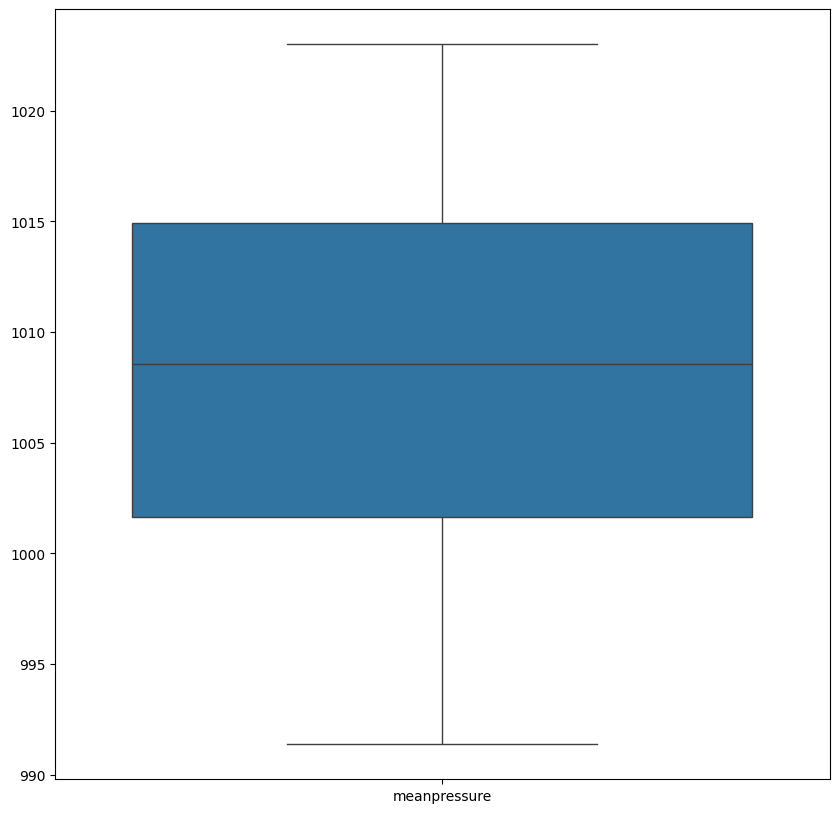

In [51]:
data.head()
sns.boxplot(data =data_out[['meanpressure']])

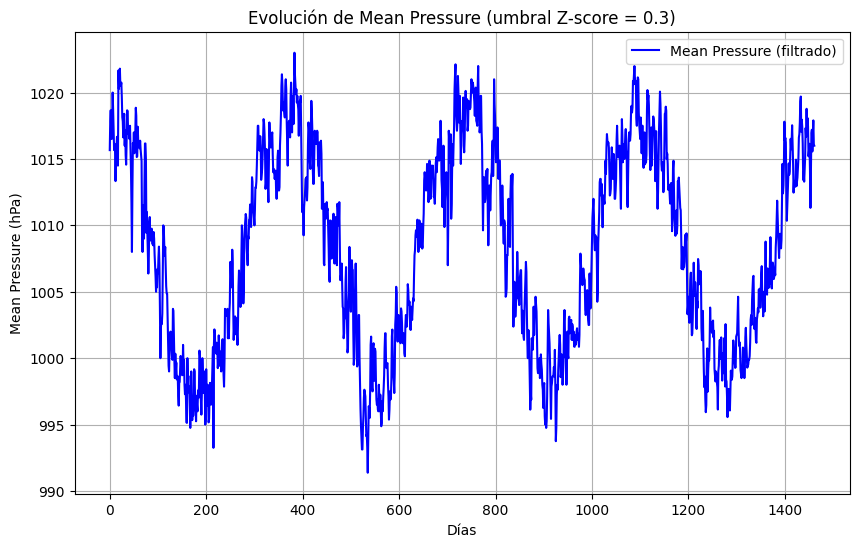

In [52]:
# Variar el valor del humbral de Zscore para filtrar valores atípicos hasta que considere que la gráfica de la variable
#  meanpressure sea correcta

def graficar_filtrando_outliers(umbral):
    zscore = np.abs(stats.zscore(data_aux['meanpressure']))
    data_filtrada = data_aux[zscore < umbral]

    # Graficar la presión filtrada
    plt.figure(figsize=(10, 6))
    plt.plot(data_filtrada['meanpressure'], label='Mean Pressure (filtrado)', color='b')
    plt.xlabel('Días')
    plt.ylabel('Mean Pressure (hPa)')
    plt.title(f'Evolución de Mean Pressure (umbral Z-score = {umbral})')
    plt.legend()
    plt.grid(True)
    plt.show()

graficar_filtrando_outliers(umbral=0.3)




In [53]:
# Para los datos sin outliers verificar nuevamente las estadísticas generales
# Qué puede decir de los valores máximos y mínimos de los datos filtrados
data_out.info()
data_out.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meanpressure  1453 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


,meanpressure
count,1453.000000
mean,1008.269018
std,7.437835
min,991.375000
25%,1001.625000
50%,1008.571429
75%,1014.937500
max,1023.000000


<Axes: >

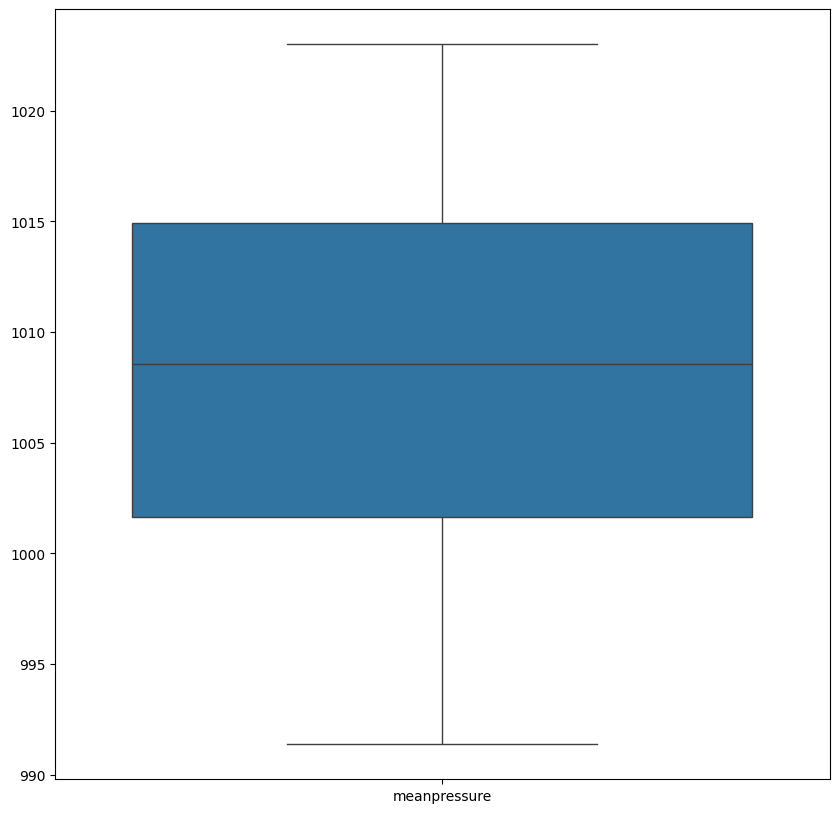

In [54]:
# Realice un diagrama de cajas y alambres para determinar visualmente si aún hay outliers
sns.boxplot(data = data_out[['meanpressure']])